# Read Dataset

In [90]:
import pandas as pd 
df = pd.read_csv("amazon_alexa.csv")

In [91]:
df.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


# Null values

In [92]:
df.isnull().sum()

reviews      0
sentiment    0
dtype: int64

# Preprocessing

In [93]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [94]:
#removing punctuations

df.replace('[^a-zA-Z]', ' ',regex = True, inplace = True)

In [95]:
#converting to lowercase

df['reviews'] = df['reviews'].str.lower()

In [96]:
#tokenization

revs = df['reviews']
for i in range (len(revs)):
    revs[i] = nltk.word_tokenize(df["reviews"][i])
df['reviews']=revs 

C:\Users\deepa\AppData\Local\Temp\ipykernel_18636\3796734160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revs[i] = nltk.word_tokenize(df["reviews"][i])


In [97]:
df['reviews']

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: reviews, Length: 3150, dtype: object

In [98]:
#removing stopwords

for i in range (len(revs)):
    for j in revs[i]:
        if j in stopwords.words('english'):
            revs[i].remove(j)

df['reviews']=revs 

In [99]:
#stemming

stemmer = PorterStemmer()
for rev in df['reviews']:
    for w in range (len(rev)):
         rev[w] = stemmer.stem(rev[w])


# Oversampling

In [100]:
df_class_0 = df[df['sentiment'] == 0]
df_class_1 = df[df['sentiment'] == 1]

In [101]:
df_class_0.shape

(257, 2)

In [102]:
df_class_1.shape

(2893, 2)

In [106]:
df_oversample_0 = df_class_0.sample(2893,replace = True)
new_df_column = pd.concat([df_oversample_0, df_class_1], axis = 0)

print(new_df_column)

                                                reviews  sentiment
2979                                                 []          0
1147  [we, first, receiv, product, wa, great, howev,...          0
1576                                          [f, suck]          0
1885                                   [habla, espanol]          0
2659  [sound, terribl, not, pair, echo, play, simult...          0
...                                                 ...        ...
3145            [perfect, kid, adult, everyon, between]          1
3146  [listen, music, search, locat, check, time, lo...          1
3147  [do, love, thing, have, run, entir, home, tv, ...          1
3148  [complaint, sound, qualiti, great, mostli, use...          1
3149                                             [good]          1

[5786 rows x 2 columns]


# Tf-idf Vectorizer


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(new_df_column['reviews'])

In [117]:
vectorizer.vocabulary_

{'we': 2781,
 'first': 959,
 'receiv': 2016,
 'product': 1937,
 'wa': 2763,
 'great': 1091,
 'howev': 1213,
 'week': 2790,
 'ago': 64,
 'devic': 672,
 'serv': 2197,
 'a': 0,
 'video': 2743,
 'advertis': 50,
 'around': 164,
 'pm': 1878,
 'night': 1671,
 'scare': 2144,
 'famili': 915,
 'want': 2768,
 'make': 1518,
 'sure': 2467,
 'are': 155,
 'protect': 1950,
 'and': 121,
 'don': 738,
 'allow': 88,
 'directli': 698,
 'your': 2882,
 'home': 1194,
 'spot': 2375,
 'not': 1689,
 'can': 378,
 'keep': 1372,
 'you': 2878,
 'safe': 2128,
 'f': 901,
 'suck': 2452,
 'habla': 1114,
 'espanol': 842,
 'sound': 2339,
 'terribl': 2518,
 'pair': 1791,
 'echo': 782,
 'play': 1866,
 'simultan': 2249,
 'must': 1622,
 'upgrad': 2702,
 'amazon': 110,
 'music': 1621,
 'than': 2526,
 'one': 1733,
 'time': 2575,
 'alexa': 80,
 't': 2480,
 'know': 1389,
 'answer': 127,
 'mani': 1526,
 'question': 1974,
 'ask': 172,
 'exampl': 870,
 'cup': 595,
 'pound': 1898,
 'she': 2212,
 'said': 2129,
 'form': 989,
 'money': 

In [118]:
Y = new_df_column['sentiment']

# Train- Test split

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state = 15)

# naive_bayes

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       582
           1       0.91      0.91      0.91       576

    accuracy                           0.91      1158
   macro avg       0.91      0.91      0.91      1158
weighted avg       0.91      0.91      0.91      1158



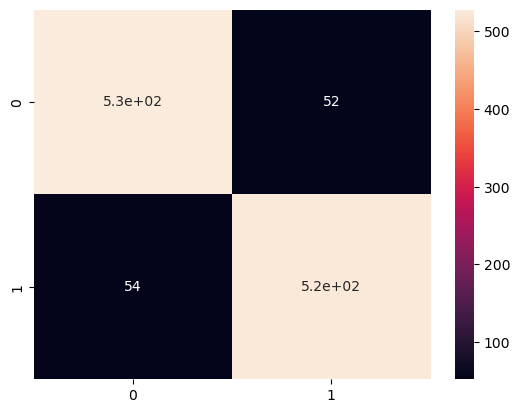

In [120]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

nb_pred = NB_classifier.predict(X_test)

cm = confusion_matrix(nb_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, nb_pred))

# Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       582
           1       0.91      0.91      0.91       576

    accuracy                           0.91      1158
   macro avg       0.91      0.91      0.91      1158
weighted avg       0.91      0.91      0.91      1158



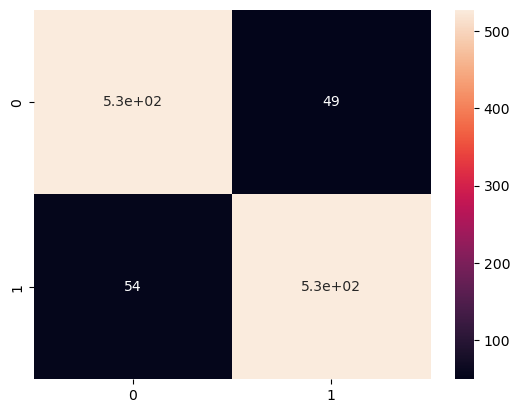

In [121]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

cm = confusion_matrix(lr_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, lr_pred))

# KNN

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       582
           1       1.00      0.42      0.59       576

    accuracy                           0.71      1158
   macro avg       0.82      0.71      0.68      1158
weighted avg       0.82      0.71      0.68      1158



C:\Users\deepa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


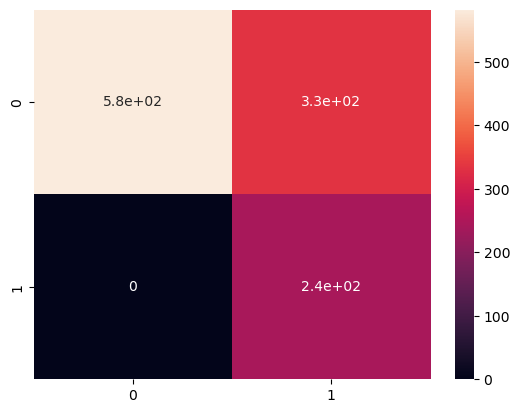

In [122]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(knn_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, knn_pred))

In [1]:
#Logistic and Multinomial Naive Bayes are recommended for this dataset as high accuracy is obtained